<a href="https://colab.research.google.com/github/LEEGWONSEOK/DataAnalysis-Project/blob/main/AI_04_%EC%9D%B4%EA%B6%8C%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**S1_Project**



신사업 구성 -> 내년초에 만들껀데
<br>
<br>

#### **방향성** 

내가 다니는 '퍼블리셔기업' 이거나 '에이전시회사' 입장에서 분석 → 

기업(`Publisher`) 하나를 선택하여 분석하기

기업 선정은 어떻게 할까? → `Activision` 기업선택 (콜옵 만든 기업이라서)

<br>
<br>

###**필수 사항**
1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

<br>
<br>

#### **01. 지역에 따라서 선호하는 게임 장르가 다를까 (현황)**

`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales` 

총 4가지 지역에서 출고된 `Genre` 의 종류를 나열하고,<br>

`Activision`은 어디에서 인기가 많을지 판단

<br>
<br> 

#### **02. 연도별 게임의 트렌드가 있을까 (현황)**

게임의 트렌드 → 해당 년도에 가장 많이 팔린 `Genre`라고 판단.<br>

(`Genre`의 종류 파악해야 됨)

`Percent Stacks Bar Chart` 로 시각화할 예정 (있는지 찾아봐야됨)

<br>
<br>

#### **03. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 (해당)**

가장 많이 팔린 `Genre`, `Platform`, `Publisher` 을 분석하여

지역마다 출고량 분석하여 선호하는 것들이 뭐가뭐가 있는지 파악하고

<br>
<br>

###**01.데이터 전처리**

####**Module 생성**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
plt.rcParams['figure.figsize'] = [16, 10]       # 그래프 사이즈 규격 만들기

####**데이터 불러오기**

In [3]:
row_data = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

df = pd.read_csv(row_data)

df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
#df.shape    # (16598, 10)
df.dtypes   # row_data에서는 year값만 정수형이다.

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

####**데이터 전처리(결측치 제거)**

In [5]:
df = df.dropna(axis=0)
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
#df.shape    # (16241, 11) : year
df.dtypes 

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

####**데이터 전처리**

In [7]:
# year value 수정
y_condition = [(df['Year'] <= 21),
               (df['Year'] >21) & (df['Year'] < 100),
               (df['Year'] >= 100)]
y_choice = [2000, 1900, 0]
df['year_update'] = np.select(y_condition, y_choice)
df['year_update'] = pd.to_numeric(df['year_update'])
df['Year'] = df['Year'] + df['year_update']

# sales value 수정
def del_K(string):
  x = string.replace('K','*0.001')
  return x

def del_M(string):
  x = eval(string.replace('M', ''))
  return x

df['NA_Sales'] = df['NA_Sales'].apply(del_K)
df['NA_Sales'] = df['NA_Sales'].apply(del_M)

df['JP_Sales'] = df['JP_Sales'].apply(del_K)
df['JP_Sales'] = df['JP_Sales'].apply(del_M)

df['EU_Sales'] = df['EU_Sales'].apply(del_K)
df['EU_Sales'] = df['EU_Sales'].apply(del_M)

df['Other_Sales'] = df['Other_Sales'].apply(del_K)
df['Other_Sales'] = df['Other_Sales'].apply(del_M)

# df 정리

df.drop(['Unnamed: 0','year_update'], axis=1, inplace=True)
df.sort_values(by='Year', axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01
1,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05
2,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03
3,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00
4,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00


###**전체 데이터**

####**장르별 판매량이 높은 게임**

JP

In [8]:
df_jp = df.sort_values(ascending = False,by = 'JP_Sales')
df_jp = df_jp.iloc[:9]
df_jp = df_jp.sort_values(ascending = True,by = 'JP_Sales')
df_jp['Name'] = df_jp['Name'] + '(' + df_jp['Platform'] + ')'
df_jp

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6046,Brain Age 2: More Training in Minutes a Day(DS),DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18
5572,Animal Crossing: Wild World(DS),DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88
3531,Pokemon Ruby/Pokemon Sapphire(GBA),GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50
12017,Pokemon Black/Pokemon White(DS),DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82
6128,Pokemon Diamond/Pokemon Pearl(DS),DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37
6143,New Super Mario Bros.(DS),DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90
129,Super Mario Bros.(NES),NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
1786,Pokemon Gold/Pokemon Silver(GB),GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71
883,Pokemon Red/Pokemon Blue(GB),GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00


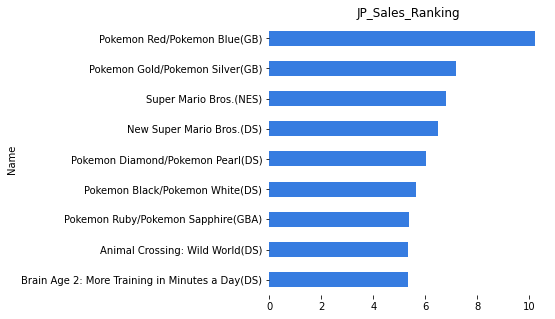

In [9]:
plt.rcParams['figure.figsize'] = [5, 5]
g_rank_jp = df_jp.plot.barh(x = 'Name', y='JP_Sales', rot=0, color='#367CE0')
plt.legend().remove()
plt.title('JP_Sales_Ranking')
plt.box(False)
plt.show()

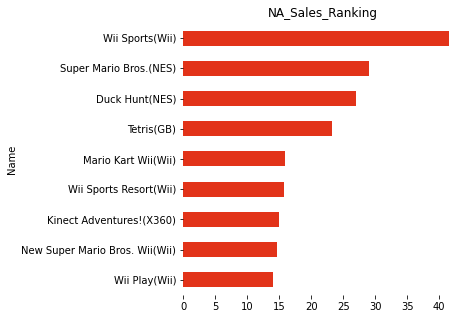

In [10]:
df_na = df.sort_values(ascending = False,by = 'NA_Sales')
df_na = df_na.iloc[:9]
df_na = df_na.sort_values(ascending = True,by = 'NA_Sales')
df_na['Name'] = df_na['Name'] + '(' + df_na['Platform'] + ')'

plt.rcParams['figure.figsize'] = [5, 5]
g_rank_na = df_na.plot.barh(x = 'Name', y='NA_Sales', rot=0, color='#E23319')
plt.legend().remove()
plt.title('NA_Sales_Ranking')
plt.box(False)
plt.show()

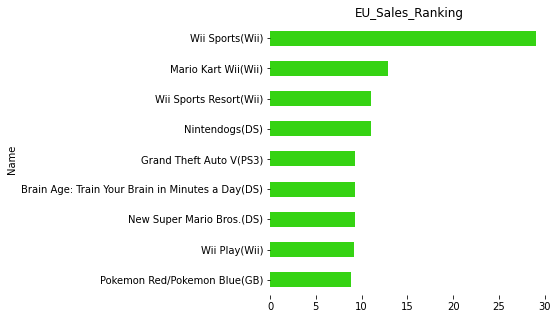

In [11]:
df_eu = df.sort_values(ascending = False,by = 'EU_Sales')
df_eu = df_eu.iloc[:9]
df_eu = df_eu.sort_values(ascending = True,by = 'EU_Sales')
df_eu['Name'] = df_eu['Name'] + '(' + df_eu['Platform'] + ')'

plt.rcParams['figure.figsize'] = [5, 5]
g_rank_eu = df_eu.plot.barh(x = 'Name', y='EU_Sales', rot=0, color='#35D313')
plt.legend().remove()
plt.title('EU_Sales_Ranking')
plt.box(False)
plt.show()

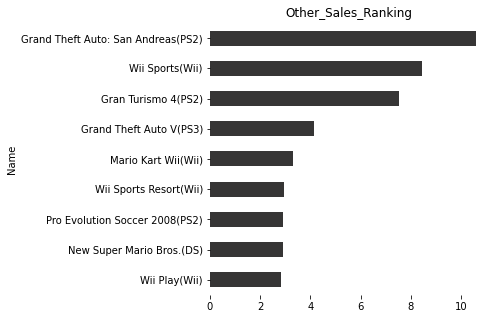

In [12]:
df_ot = df.sort_values(ascending = False,by = 'Other_Sales')
df_ot = df_ot.iloc[:9]
df_ot = df_ot.sort_values(ascending = True,by = 'Other_Sales')
df_ot['Name'] = df_ot['Name'] + '(' + df_ot['Platform'] + ')'

plt.rcParams['figure.figsize'] = [5, 5]
g_rank_ot = df_ot.plot.barh(x = 'Name', y='Other_Sales', rot=0, color='#363535')
plt.legend().remove()
plt.title('Other_Sales_Ranking')
plt.box(False)
plt.show()

####**Genre; Sales**

In [13]:
# Genre에 따라 지역별 구매량

def groupdf_gs(x):
  grouped = df[x].groupby(df['Genre'])
  return grouped.sum()

df_gs = pd.DataFrame({'NA_Sales': groupdf_gs('NA_Sales'),
                      'EU_Sales': groupdf_gs('EU_Sales'),
                      'JP_Sales': groupdf_gs('JP_Sales'),
                      'Other_Sales': groupdf_gs('Other_Sales')})

df_gs['sum'] = df_gs['NA_Sales'] + df_gs['EU_Sales'] + df_gs['JP_Sales'] + df_gs['Other_Sales']

df_gs.sort_values(ascending = True, by='sum', axis=0, inplace=True)

df_gs.drop(['sum'], axis=1, inplace=True)

df_gs = df_gs.reset_index()
df_gs

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Strategy,67.83,44.82,49.10,11.23
1,Adventure,101.79,63.66,51.87,16.70
2,Puzzle,121.58,50.47,56.24,12.44
3,Simulation,181.43,112.99,63.54,31.32
4,Fighting,220.35,99.90,87.14,36.15
5,Racing,354.70,235.02,56.32,76.51
6,Misc,394.73,208.15,104.18,72.64
7,Platform,445.38,200.63,130.53,51.45
8,Role-Playing,318.76,183.09,342.93,56.73
9,Shooter,574.48,310.23,38.18,101.86


####**데이터 시각화**

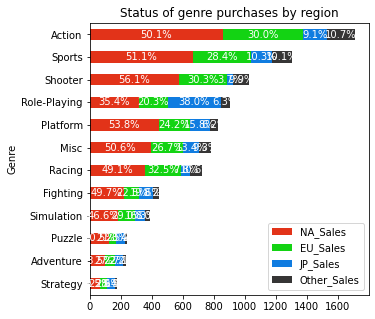

In [14]:
colors = ['#E23319', '#13D313', '#107CE0', '#363535']

df_gs.plot(
    x = 'Genre',
    kind = 'barh',
    stacked = True,
    color = colors,
    title = 'Status of genre purchases by region',
    mark_right = True)


df_gs_total = df_gs['NA_Sales'] + df_gs['EU_Sales'] + df_gs['JP_Sales'] + df_gs['Other_Sales']
df_gs_rel = df_gs[df_gs.columns[1:]].div(df_gs_total, 0)*100
  
for n in df_gs_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_gs.iloc[:, 1:].cumsum(1)[n], 
                                         df_gs[n], df_gs_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center', color = 'white')        

####**Genre; Sales**

In [15]:
df_gs1 = df       # df_act_gs : genre;sales 그래프

def group_gs1(x):
  grouped = df_gs1[x].groupby(df_gs1['Genre'])
  return grouped.sum()

df_gs1 = pd.DataFrame({'Other_Sales': group_gs1('Other_Sales'),
                          'JP_Sales': group_gs1('JP_Sales'),
                          'EU_Sales': group_gs1('EU_Sales'),
                          'NA_Sales': group_gs1('NA_Sales')})


df_gs1['sum'] = df_gs1['NA_Sales'] + df_gs1['EU_Sales'] + df_gs1['JP_Sales'] + df_gs1['Other_Sales']
df_gs1.sort_values(ascending = True, by='NA_Sales', axis=0, inplace=True)

#df2_act = df2_act.reset_index()
#df2 = df2.reset_index()
#df2

#df_activision
df_gs1.drop(['sum'], axis=1, inplace=True)
df_gs1 = df_gs1.drop(index=['Puzzle', 'Fighting', 'Adventure', 'Simulation', 'Strategy', 'Racing', 'Platform'], axis=0)
df_gs1

,Other_Sales,JP_Sales,EU_Sales,NA_Sales
Genre,,,,
Role-Playing,56.73,342.93,183.09,318.76
Misc,72.64,104.18,208.15,394.73
Shooter,101.86,38.18,310.23,574.48
Sports,132.35,134.76,370.97,667.26
Action,183.99,156.60,513.64,858.75


Text(0, 0.5, 'Sales')

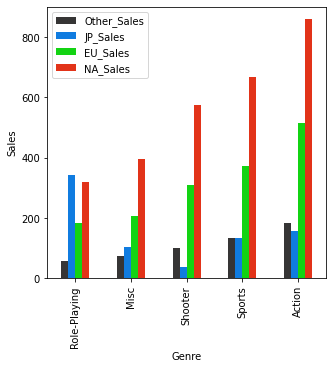

In [16]:
colors2 = ['#363535', '#107CE0', '#13D313', '#E23319']
df_gs1.plot(kind='bar', color = colors2);
plt.xlabel('Genre')
plt.ylabel('Sales')

####**Platform; Sales**

In [17]:
# Platform에 따라 지역별 구매량

def groupdf_ps(x):
  grouped = df[x].groupby(df['Platform'])
  return grouped.sum()

df_ps = pd.DataFrame({'Other_Sales': groupdf_ps('Other_Sales'),
                      'JP_Sales': groupdf_ps('JP_Sales'),
                      'EU_Sales': groupdf_ps('EU_Sales'),
                      'NA_Sales': groupdf_ps('NA_Sales')})

df_ps['sum'] = df_ps['NA_Sales'] + df_ps['EU_Sales'] + df_ps['JP_Sales'] + df_ps['Other_Sales']

df_ps.sort_values(ascending = True, by='sum', axis=0, inplace=True)

df_ps.drop(['sum'], axis=1, inplace=True)
df_ps = df_ps.reset_index()
df_ps = df_ps.drop(index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], axis=0)
#df_ps = df_ps.reset_index()
df_ps = df_ps.set_index('Platform')
df_ps

,Other_Sales,JP_Sales,EU_Sales,NA_Sales
Platform,,,,
PS,40.53,139.09,211.75,333.79
DS,60.24,174.97,194.05,387.93
Wii,78.48,65.79,260.78,495.10
PS3,140.47,78.56,339.71,388.00
X360,84.62,12.29,277.90,593.78
PS2,187.77,134.10,332.03,568.54


Text(0, 0.5, 'Sales')

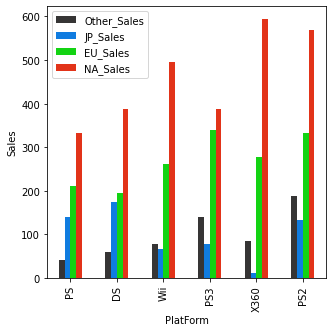

In [18]:
colors2 = ['#363535', '#107CE0', '#13D313', '#E23319']
df_ps.plot(kind='bar', color = colors2)
plt.xlabel('PlatForm')
plt.ylabel('Sales')

####**Genre; Year**

In [19]:
df_yg = pd.crosstab(df['Year'], df['Genre'])

#df_yg = df_yg[['Shooter', 'Action', 'Sports', 'Misc']].plot(kind='line')
df_yg = df_yg[['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc']]

df_yg



Genre,Action,Sports,Shooter,Role-Playing,Platform,Misc
Year,,,,,,
1980.0,1,0,2,0,0,4
1981.0,25,4,10,0,3,0
1982.0,18,2,5,0,5,1
1983.0,7,1,1,0,5,1
1984.0,1,2,3,0,1,1
1985.0,2,1,1,0,4,0
1986.0,6,3,4,1,6,0
1987.0,2,4,2,3,2,0
1988.0,2,2,1,3,4,0


In [20]:
list_1 = df_yg.iloc[2:7].sum().tolist()
list_2 = df_yg.iloc[7:12].sum().tolist()
list_3 = df_yg.iloc[12:17].sum().tolist()
list_4 = df_yg.iloc[17:22].sum().tolist()
list_5 = df_yg.iloc[22:27].sum().tolist()
list_6 = df_yg.iloc[27:32].sum().tolist()
list_7 = df_yg.iloc[32:37].sum().tolist()
#list_8 = df_yg.iloc[35:40].sum().tolist()

yg_5_data = {'82-86': list_1,
             '87-91': list_2,
             '92-96': list_3,
             '97-01': list_4,
             '02-06': list_5,
             '07-11': list_6,
             '12-16': list_7}
df_yg_5 = pd.DataFrame(yg_5_data).T

df_yg_5.columns=['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc']

df_yg_5

,Action,Sports,Shooter,Role-Playing,Platform,Misc
82-86,34,9,14,1,21,3
87-91,14,19,7,15,18,2
92-96,39,116,68,83,55,56
97-01,223,355,122,151,128,104
02-06,770,676,404,341,366,384
07-11,1165,858,433,516,200,950
12-16,968,262,220,356,82,178


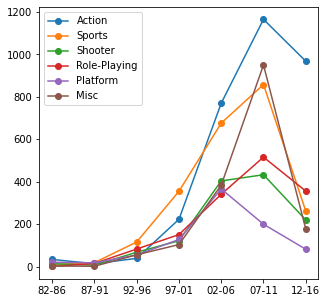

In [21]:
df_yg_5.plot(kind='line', marker='o')


In [22]:
plt.plot

<function matplotlib.pyplot.plot>

####**Platform; Year**

In [23]:
df_yp = pd.crosstab(df['Year'], df['Platform'])

#df_yg = df_yg[['Shooter', 'Action', 'Sports', 'Misc']].plot(kind='line')
#df_yg = df_yg[['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc']]

df_yp

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981.0,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1982.0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1983.0,11,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1984.0,1,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1985.0,1,0,0,0,1,0,0,0,0,0,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1986.0,2,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987.0,6,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1988.0,2,0,0,0,0,1,0,0,0,0,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
list_1 = df_yp.iloc[2:7].sum().tolist()
list_2 = df_yp.iloc[7:12].sum().tolist()
list_3 = df_yp.iloc[12:17].sum().tolist()
list_4 = df_yp.iloc[17:22].sum().tolist()
list_5 = df_yp.iloc[22:27].sum().tolist()
list_6 = df_yp.iloc[27:32].sum().tolist()
list_7 = df_yp.iloc[32:37].sum().tolist()
#list_8 = df_yp.iloc[35:40].sum().tolist()

column_name = ['2600','3DO','3DS','DC','DS','GB','GBA','GC','GEN','GG','N64',
               'NES','NG','PC','PCFX','PS','PS2','PS3','PS4','PSP','PSV','SAT',
               'SCD','SNES','TG16','WS','Wii','WiiU','X360','XB','XOne']

yp_5_data = {'82-86': list_1,
             '87-91': list_2,
             '92-96': list_3,
             '97-01': list_4,
             '02-06': list_5,
             '07-11': list_6,
             '12-16': list_7}
df_yp_5 = pd.DataFrame(yp_5_data).T
df_yp_5.columns=column_name
df_yp_5.drop(['3DO','GEN','GG','NG','PCFX','SCD','TG16','WS','2600','DC','N64','GB','NES','SNES','GBA','SAT','GC','WiiU','PSV','PS','XB','PS4','3DS'], axis=1, inplace=True)
df_yp_5

,DS,PC,PS2,PS3,PSP,Wii,X360,XOne
82-86,1,1,0,0,0,0,0,0
87-91,0,1,0,0,0,0,0,0
92-96,0,17,0,0,0,0,0,0
97-01,0,43,266,0,0,0,0,0
02-06,342,172,1312,27,299,44,111,0
07-11,1750,470,543,785,722,1186,827,0
12-16,33,231,0,487,172,54,293,212


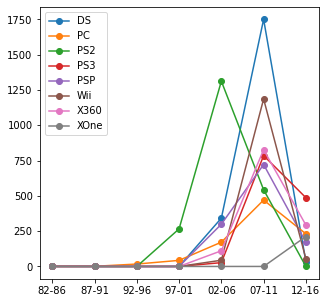

In [25]:
df_yp_5.plot(kind='line', marker='o')

####**Platform; Game**

In [26]:
freq1 = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].copy()
freq1['sum'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
freq1.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)
freq1 = freq1.groupby(['Platform']).count() 
freq1.sort_values(ascending = True, by='sum', axis=0, inplace=True)
#freq = freq['Publisher']
freq1 = freq1.reset_index()
freq1 = freq1.drop(index=[0, 1, 2, 3, 4, 5, 6, 7], axis=0)

freq1

#freq1.dtypes

,Platform,sum
8,DC,52
9,GB,97
10,NES,98
11,2600,115
12,WiiU,143
13,SAT,173
14,XOne,212
15,SNES,239
16,N64,313
17,PS4,335


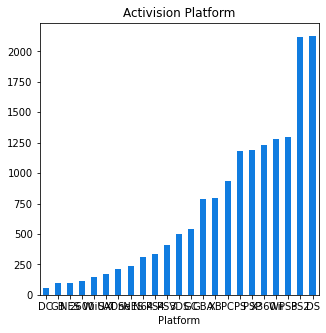

In [27]:
# bar chart 시각화
freq1_bar = freq1.plot.bar(x = 'Platform', y='sum', rot=0, color='#107CE0')

#label = freq['Platform']
#index = np.arange(len(label))

#plt.bar(index, freq1)
plt.legend().remove()
plt.title('Activision Platform')
plt.xlabel('Platform')
plt.show()

####**Genre; Game**

In [28]:
freq_gg = df.groupby(['Genre']).count() 
freq_gg.sort_values(ascending = True, by='Publisher', axis=0, inplace=True)
freq_gg = freq_gg['Publisher']
freq_gg = freq_gg.reset_index()
freq_gg

,Genre,Publisher
0,Puzzle,566
1,Strategy,669
2,Fighting,835
3,Simulation,846
4,Platform,873
5,Racing,1219
6,Adventure,1268
7,Shooter,1280
8,Role-Playing,1465
9,Misc,1681


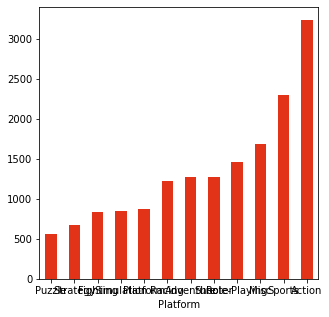

In [29]:
# bar chart 시각화
freq_gg_bar = freq_gg.plot.bar(x = 'Genre', y='Publisher', rot=0, color='#E23319')

#label = freq['Platform']
#index = np.arange(len(label))

#plt.bar(index, freq1)
plt.legend().remove()
#plt.title('Activision Platform')
plt.xlabel('Platform')
plt.show()

###**Activision 데이터**

####**Activision 데이터 생성**

In [30]:
activision = df['Publisher'] == 'Activision'
df_act = df[activision]
df_act.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01
3,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00
4,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00
7,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01
13,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.0,0.05


####**Genre; Sales**

In [31]:
# Activision : Genre에 따라 지역별 구매량
df_act_gs = df_act       # df_act_gs : genre;sales 그래프

def group_act_gs(x):
  grouped = df_act_gs[x].groupby(df_act_gs['Genre'])
  return grouped.sum()

df_act_gs = pd.DataFrame({'Other_Sales': group_act_gs('Other_Sales'),
                          'JP_Sales': group_act_gs('JP_Sales'),
                          'EU_Sales': group_act_gs('EU_Sales'),
                          'NA_Sales': group_act_gs('NA_Sales')})


df_act_gs['sum'] = df_act_gs['NA_Sales'] + df_act_gs['EU_Sales'] + df_act_gs['JP_Sales'] + df_act_gs['Other_Sales']
df_act_gs.sort_values(ascending = True, by='NA_Sales', axis=0, inplace=True)

#df2_act = df2_act.reset_index()
#df2 = df2.reset_index()
#df2

#df_activision
df_act_gs.drop(['sum'], axis=1, inplace=True)
df_act_gs = df_act_gs.drop(index=['Puzzle', 'Fighting', 'Adventure', 'Simulation', 'Strategy', 'Racing', 'Platform'], axis=0)
df_act_gs


,Other_Sales,JP_Sales,EU_Sales,NA_Sales
Genre,,,,
Role-Playing,4.55,0.26,18.40,23.58
Misc,10.07,0.05,17.63,48.68
Sports,5.38,0.13,17.50,51.73
Action,13.59,1.08,39.47,86.48
Shooter,34.65,4.64,96.86,159.05


Activision 에서는 `Shooter`, `Action`, `Sports`, `Misc` `Role-Playing` 

5종류의 장르게임이 구매량이 높다는 것을 확인할 수 있다.

Text(0, 0.5, 'Sales')

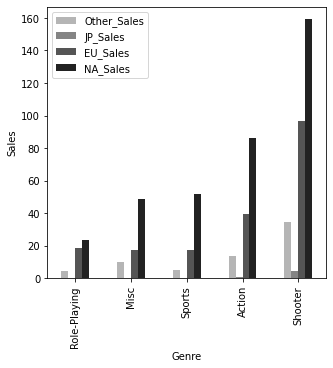

In [32]:
colors2 = ['#B5B5B5', '#848484', '#555555', '#222222']
df_act_gs.plot(kind='bar', color = colors2);
plt.xlabel('Genre')
plt.ylabel('Sales')

####**Genre; Game**

In [33]:
freq_act_gg = df_act.groupby(['Genre']).count() 
freq_act_gg.sort_values(ascending = True, by='Publisher', axis=0, inplace=True)
freq_act_gg = freq_act_gg['Publisher']
freq_act_gg = freq_act_gg.reset_index()
freq_act_gg

,Genre,Publisher
0,Fighting,7
1,Puzzle,7
2,Strategy,22
3,Simulation,23
4,Adventure,25
5,Role-Playing,41
6,Platform,60
7,Racing,73
8,Misc,103
9,Sports,141


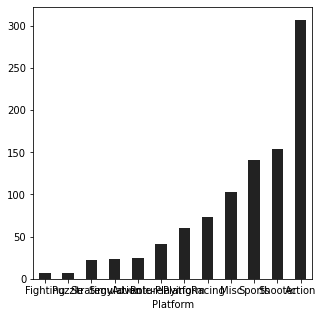

In [34]:
# bar chart 시각화
freq_act_gg_bar = freq_act_gg.plot.bar(x = 'Genre', y='Publisher', rot=0, color='#222222')

#label = freq['Platform']
#index = np.arange(len(label))

#plt.bar(index, freq1)
plt.legend().remove()
#plt.title('Activision Platform')
plt.xlabel('Platform')
plt.show()

####**Platform;Sales**

In [35]:
# Platform에 따라 지역별 구매량

def groupdf_act_ps(x):
  grouped = df_act[x].groupby(df_act['Platform'])
  return grouped.sum()

df_act_ps = pd.DataFrame({'Other_Sales': groupdf_act_ps('Other_Sales'),
                      'JP_Sales': groupdf_act_ps('JP_Sales'),
                      'EU_Sales': groupdf_act_ps('EU_Sales'),
                      'NA_Sales': groupdf_act_ps('NA_Sales')})

df_act_ps['sum'] = df_act_ps['NA_Sales'] + df_act_ps['EU_Sales'] + df_act_ps['JP_Sales'] + df_act_ps['Other_Sales']

df_act_ps.sort_values(ascending = True, by='sum', axis=0, inplace=True)

df_act_ps.drop(['sum'], axis=1, inplace=True)
df_act_ps = df_act_ps.reset_index()
df_act_ps = df_act_ps.drop(index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], axis=0)
#df_ps = df_ps.reset_index()
df_act_ps = df_act_ps.set_index('Platform')
df_act_ps

,Other_Sales,JP_Sales,EU_Sales,NA_Sales
Platform,,,,
DS,3.60,0.07,7.96,30.25
PC,4.30,0.00,24.96,16.64
Wii,5.17,0.14,14.23,40.30
PS2,13.59,0.53,22.25,49.20
PS3,18.85,3.39,46.16,56.90
X360,13.74,0.61,39.98,104.37


Text(0, 0.5, 'Sales')

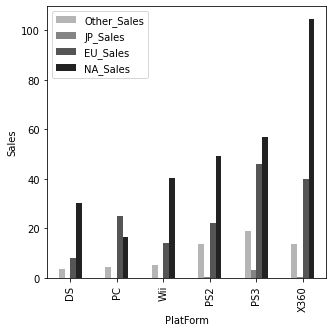

In [36]:
colors2 = ['#B5B5B5', '#848484', '#555555', '#222222']
df_act_ps.plot(kind='bar', color = colors2)
plt.xlabel('PlatForm')
plt.ylabel('Sales')

####**Platform; Game**

In [37]:
# activision 플랫폼 수

freq = df_act.groupby(['Platform']).count() 
freq.sort_values(ascending = True, by='Publisher', axis=0, inplace=True)
freq = freq['Publisher']
freq = freq.reset_index()
freq

,Platform,Publisher
0,DC,1
1,GB,1
2,PSV,3
3,N64,13
4,WiiU,18
5,XOne,20
6,PS4,21
7,2600,24
8,3DS,27
9,PS,32


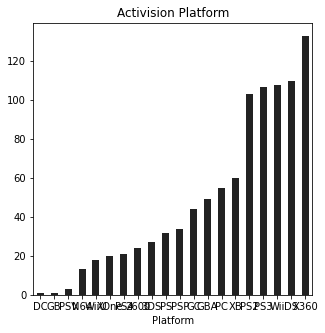

In [38]:
# bar chart 시각화
freq_bar = freq.plot.bar(x = 'Platform', y='Publisher', rot=0, color='#222222')

#label = freq['Platform']
#index = np.arange(len(label))

#plt.bar(index, freq1)
plt.legend().remove()
plt.title('Activision Platform')
plt.xlabel('Platform')
plt.show()

Activision은 전반적으로 Shooter, Action, Sports 순으로 게임 판매가 이루어지고 있다.

###**JP 데이터**

In [39]:
activision = df['Publisher'] == 'Activision'
df_act = df[activision]
rp = df['Genre']=='Role-Playing'
df_act_jp = df_act[rp]
df_act_jp = df_act_jp.sort_values(ascending = False,by = 'JP_Sales')
df_act_jp = df_act_jp.iloc[:9]
df_act_jp = df_act_jp.sort_values(ascending = True,by = 'JP_Sales')
df_act_jp['Name'] = df_act_jp['Name'] + '(' + df_act_jp['Platform'] + ')'

df_act_jp


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
799,Diablo(PC),PC,1996.0,Role-Playing,Activision,0.01,1.58,0.00,0.00
11106,Marvel: Ultimate Alliance 2(PS2),PS2,2009.0,Role-Playing,Activision,0.23,0.02,0.00,0.16
8946,World of Warcraft: Wrath of the Lich King(PC),PC,2008.0,Role-Playing,Activision,0.01,0.13,0.00,1.18
9746,Marvel: Ultimate Alliance 2(X360),X360,2009.0,Role-Playing,Activision,0.68,0.15,0.00,0.08
10370,Marvel: Ultimate Alliance 2(PS3),PS3,2009.0,Role-Playing,Activision,0.49,0.16,0.00,0.09
5604,Untold Legends: Brotherhood of the Blade(PSP),PSP,2005.0,Role-Playing,Activision,0.54,0.33,0.01,0.22
2931,Lost Kingdoms(GC),GC,2002.0,Role-Playing,Activision,0.10,0.02,0.04,0.00
15157,Diablo III(PS4),PS4,2014.0,Role-Playing,Activision,0.49,0.88,0.06,0.30
14251,Diablo III(PS3),PS3,2013.0,Role-Playing,Activision,0.71,0.83,0.15,0.35


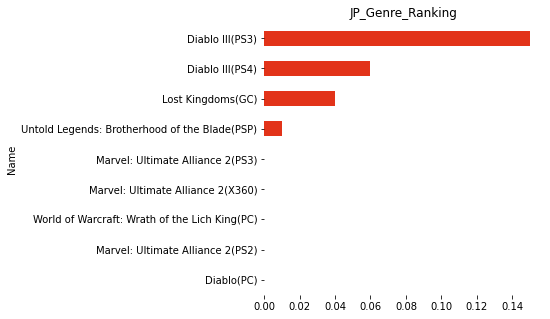

In [40]:
plt.rcParams['figure.figsize'] = [5, 5]
g_rank_jp_act = df_act_jp.plot.barh(x = 'Name', y='JP_Sales', rot=0, color='#E23319')
plt.legend().remove()
plt.title('JP_Genre_Ranking')
plt.box(False)
plt.show()

In [44]:
activision = df['Publisher'] == 'Activision'
df_act = df[activision]

rp = df_act['Genre']=='Role-Playing'
df_act_rp = df_act[rp]

ds = df_act_rp['Platform']=='DS'
df_act_rp_ds = df_act_rp[ds]

df_act_rp_ds = df_act_rp_ds[['Name','Platform','Year','Genre','Publisher','JP_Sales']]
df_act_rp_ds

,Name,Platform,Year,Genre,Publisher,JP_Sales
10856,Marvel: Ultimate Alliance 2,DS,2009.0,Role-Playing,Activision,0.0
12218,Percy Jackson and the Olympians: The Lightning...,DS,2010.0,Role-Playing,Activision,0.0
